## Author: Dr. Prabhakar Bhimalapuram for Course "Computing in Sciences II" as part of CND program
## Name of Student: Tarun Hariharan
### Roll Number: 2024113009


# Coin toss

If a coin has a probability of $p$ for showing heads and $q=1-p$ for showing heads, then the probability of seeing $M$ heads when coin is tossed $n>M$ times is given by:
$$ P(M;n) = \frac{n!}{M!(n-M)!} p^M q^{n-M} $$


If the average the number of heads is denoted $M_n\equiv M/n$, then clearly $0\le M_n \le 1$ and we expect that $M_{n\rightarrow \infty} = p$. For $M_n$ being in the range $(x,y)$, we have:
$$ Prob(x< M_n < y) = \sum_{r = ⌊nx⌋ }^{r= ⌊ n*y ⌋} P(r;n) $$
where $\lfloor y \rfloor$ is the floor function defined as the largest integer less that $y$.



## Task-1:  
1. Plot $\log P(M_n=x)$ vs $x$ for various $n$.  Note that $\int_{0}^{1} dx~P(M_n=x) = 1$.
2. Show that $P(M_n=x)$ near $x=\frac{1}{2}$ is Gaussian.

NOTE:
1. scipy.misc.comb function for combinotrics
2. Do this by curve fit of $P$ to a gaussian function

In [33]:
import scipy, scipy.special, numpy as np, matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# theoretical vs experimental prob of obtaining heads

In [34]:
# func prob_Mn(x, Mvals=None, num_toss = numToss, pHead = p)
# if Mvals==None, then calculate prob(Mn=x),
# if Mvals!= None, then for each value of M in Mvals, caculate prob(M/n)
# NOTE: use scipy.special.comb function for (N choose M)

def prob_Mn(flag, x, Mvals, num_toss, prob_heads = 0.5):
# YOUR CODE HERE...
    if (flag): #add empty Mvals == [] condition
        prob_Mvals = scipy.special.comb(num_toss, x) * (prob_heads**x) * ((1-prob_heads)**(num_toss-x))
        return prob_Mvals

    else:
        prob_Mvals = [scipy.special.comb(num_toss, M) * (prob_heads**M) * ((1-prob_heads)**(num_toss-M)) for M in Mvals]
        return np.array(Mvals)/num_toss, np.array(prob_Mvals)

    #return prob_Mvals

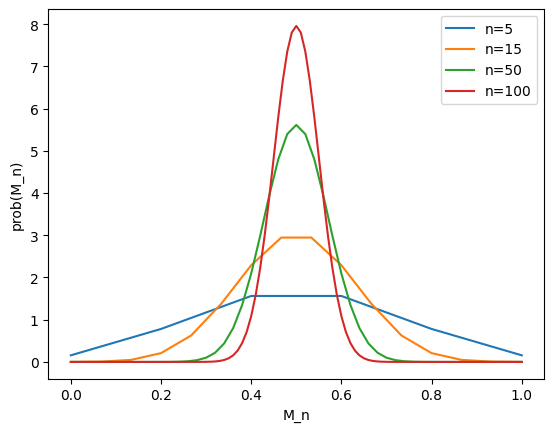

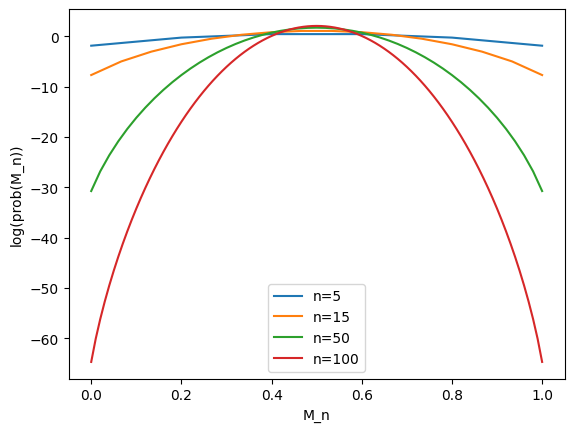

In [35]:
n_list = [5, 15, 50, 100]  # Example values

for n in n_list:
    xvals, yvals=prob_Mn(False, 0,Mvals=np.arange(0,n+1), num_toss=n)
    plt.plot(xvals,yvals*n, label=f'n={n}')
    plt.legend()

# YOUR CODE HERE

# Plot probability distributions for different n values
#plt.figure(figsize=(10, 5))

# for n in n_list:
#     xvals = (np.arange(n + 1) /n)
#     yvals = prob_Mn(xvals, num_toss=n)  

#     plt.plot(xvals, yvals, label=f'n={n}', marker='o', linestyle='-')

# plt.legend()
# plt.xlabel('M_n (Number of Heads)')
# plt.ylabel('Probability P(M_n)')
# plt.title('Probability Distribution of Coin Toss Outcomes')
# plt.grid(True)

# Show the plot

plt.xlabel('M_n')
plt.ylabel('prob(M_n)')
plt.show()

for n in n_list:
    xvals, yvals=prob_Mn(False, 0,Mvals=np.arange(0,n+1), num_toss=n)
    plt.plot(xvals,np.log(yvals*n), label=f'n={n}')
    plt.legend()
plt.xlabel('M_n')
plt.ylabel('log(prob(M_n))')
plt.show()



In [36]:
# Gaussian function
def gaussian(x,x0,sigma,height):
    '''gaussian function'''
    return height * np.exp(-(x-x0)**2/(2*sigma**2))

**Compare the curve fit to the actual function**

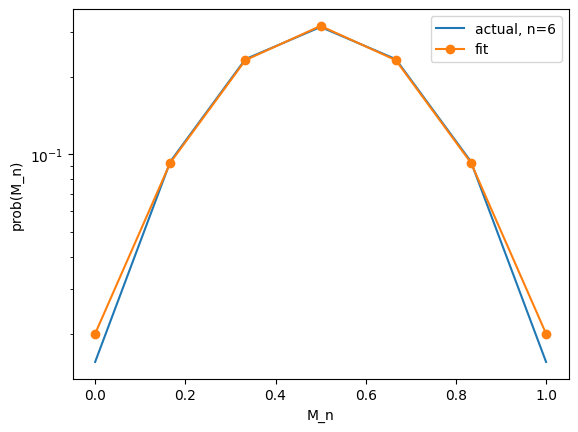

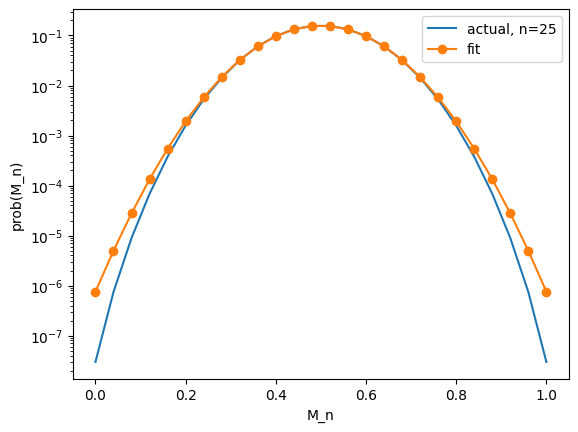

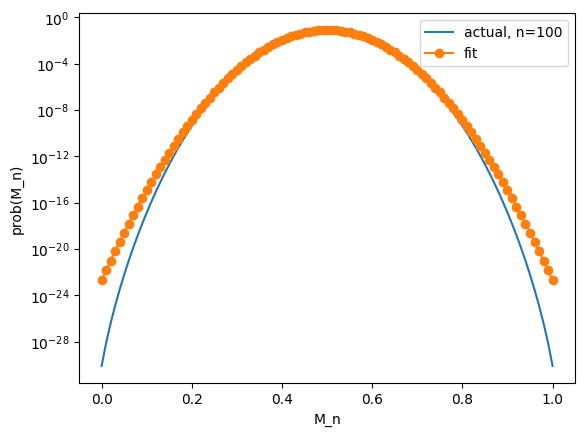

In [37]:
# curve_fit (x,y) = (M_n, prob(M_n)) for various
# for each n in n_list:
#    get xdata, ydata
#    do curve_fit, get parameters
#    get yfit from the pragameters
#    plot (xdata,ydata) and (xdata, yfit)

n_list = [6, 25, 100]
for n in n_list:
    xdata, ydata=prob_Mn(False, 0,Mvals=np.arange(0,n+1), num_toss=n)
    # YOUR DATA HERE

    popt, _ = curve_fit(gaussian, xdata, ydata)

    yfit = gaussian(xdata,*popt)

    plt.semilogy(xdata,ydata, label='actual, n='+str(n))
    plt.semilogy(xdata,yfit, '-o',label='fit')
    plt.legend()
    plt.xlabel('M_n')
    plt.ylabel('prob(M_n)')
    plt.show()




## Task-2:  Assume a fair coin from now on i.e. $p=q=\frac{1}{2}$. Plot $\log P(M_n > x)$ as a function of $n\in[1,250]$ for $x=0.6,~0.7,~0.8,~0.9$

In [38]:
np.size(yvals)

101

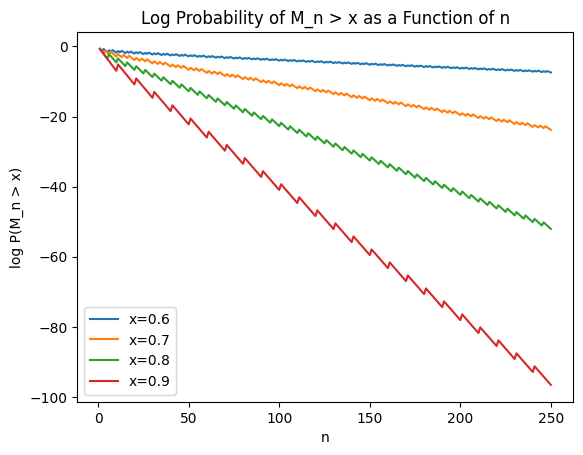

In [39]:
# task: for each x in xvals, plot (num_toss, ln(prob(Mn>x,num_toss)))
# for each n in n_list:
#      all_Mvals = numpy.arange(n_1)
#      calculate prob_Mn( Mvals=all_Mvals)
#      for each x calculate M, and use slicing and sum to get prob(Mn>x)
#       store in alldata list
#
# process alldata list: for each x in xvals, get (num_toss, ln(prob(Mn>x,num_toss)) and plot

n_list = np.arange(1,251)
# n_list = [10,20,30,40,50,60]

xvals = [0.6,0.7,0.8,0.9]
# xvals = [0.7,0.8,0.9]

for x in xvals:
    probs=[]
    for n in n_list:
        xdata, ydata = prob_Mn(False, x, Mvals=np.arange(0,n+1), num_toss=n)
        probX = np.sum(ydata[np.where(xdata>x)]) / np.sum(ydata)
        probs.append(probX)
    plt.plot(n_list, np.log(probs), label=f'x={x}')


plt.xlabel('n')
plt.ylabel('log P(M_n > x)')
plt.legend()
plt.title('Log Probability of M_n > x as a Function of n')
plt.show()
# alldata = []
# for n in n_list:

    # YOUR CODE HERE

## Task-3: Note that for large $N$, the above plots are linear.  Fit the above plots (of $\log Prob(M_n >x)$ vs $n$) to straight lines for large $n$ and get the slope, which we will call $I(x)$. Now plot $I(x)$ vs $x$.

In [40]:
# Use the alldata, some resorting may be required to get for each x, all data into a single row
# fore each x get (n=num_toss, y=ln_prob(Mn>x num_toss)) and fit it to y = I(x)*n + b to get I(x)
# plot x vs I(x)

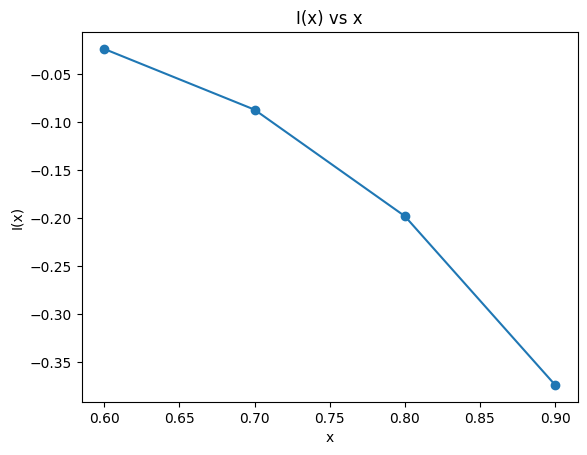

In [41]:
n_list = np.arange(1,251)
# n_list = [10,20,30,40,50,60]

xvals = [0.6,0.7,0.8,0.9]
# xvals = [0.7,0.8,0.9]

slopes=[]
for x in xvals:
    probs=[]
    for n in n_list:
        xdata, ydata = prob_Mn(False, x, Mvals=np.arange(0,n+1), num_toss=n)
        probX = np.sum(ydata[np.where(xdata>x)]) / np.sum(ydata)
        probs.append(probX)
    log_probs = np.log(probs)
    slope,_ = np.polyfit(n_list, log_probs, 1)
    slopes.append(slope)
plt.plot(xvals, slopes, marker = "o")
plt.xlabel('x')
plt.ylabel('I(x)')
plt.title('I(x) vs x')
plt.show()

## Task-4:  Random walk
Let $c(t)$ be the result of coin toss, tossed at time $t$. Then Random Walk is given by
$$ x(t+1) = x(t) + \delta_{c(t),H} - \delta_{c(t),T}
$$
with $x(0)=0$ and $c(t)$ is the coin toss at time $t$, with two possible outcomes heads ($H$) or tails ($T$).

##Plot a one realisation of $x(t)$ for $t\in[0,100]$


In [42]:
# for a given t, get binary random sample of size b(t) and convert it to step(t) and finally convert to position(t)


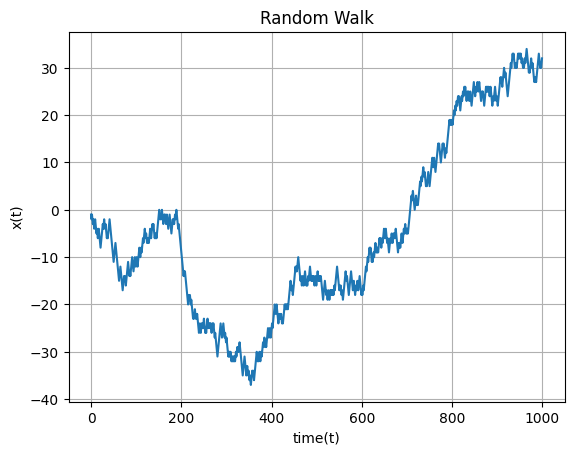

In [43]:
#np.random.binomial()

maxT = 1000

choices = np.random.choice([-1,1], size = maxT)

pos = np.cumsum(choices)

plt.plot(range(maxT), pos, linestyle = "-")
plt.xlabel("time(t)")
plt.ylabel("x(t)")
plt.title("Random Walk")
plt.grid()
plt.show()


## Task-5: Moments of distribution of $x(t)$

1. What would be $\langle x(t) \rangle$?
2. What would be $\langle x^2(t) \rangle$? Why?
3. Compute them by genrating a sample of random walks. Comment on the 'error' of the calculation

In [44]:
# task: calculate the average over num_walker independt walks!
# task-refine: given totTime and num_print, generate data for t = int * num_print till t=totTime
# for t in numpy.arange(t, num_print):
#   walker_pos is an numpy array of size num_walkers and inititlize to 0 position
#   for t1 in range(num_print):
#       generate step for each walker and hence the new position
#   calcualte averages <x(t)> and <x^2(t)> and store
#
# plot t vs <x(t)>
# plot t vs <x^2(t)>

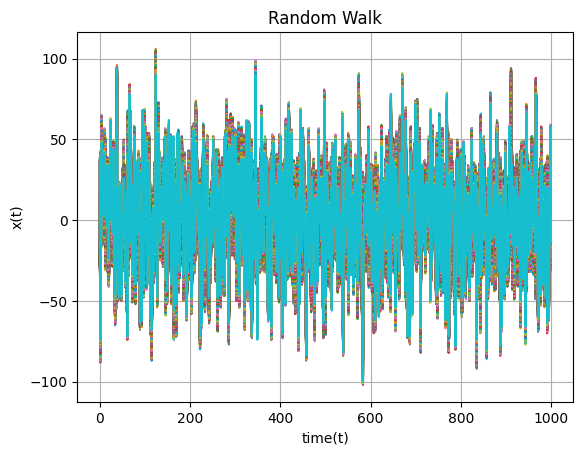

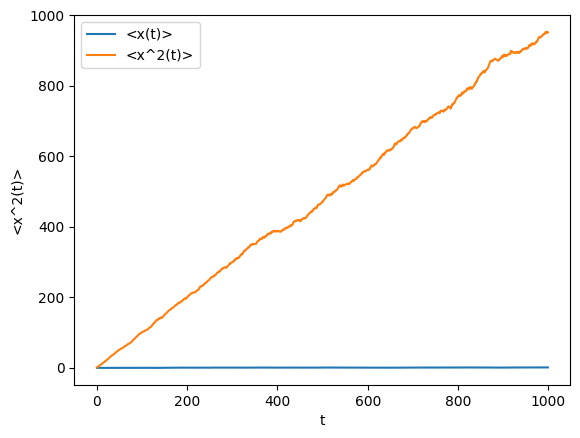

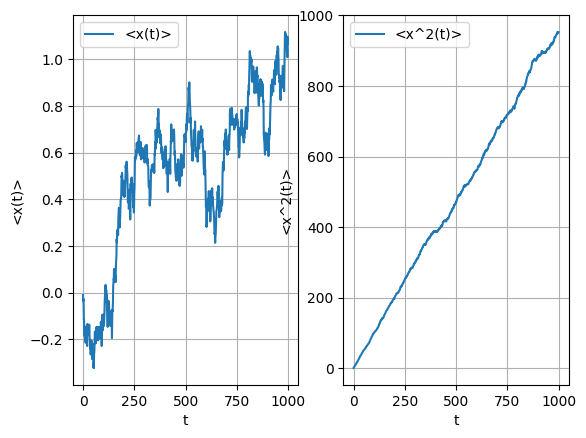

In [45]:
num_walker = 1000

maxT = 1000

choices = np.random.choice([-1,1], size = (num_walker, maxT))

pos = np.cumsum(choices, axis=1) #squashing axis 1 - cumsum over choices for each num_walker

meanX = np.mean(pos, axis=0) #squashing into axis 0 - mean of cumsum    
meanX2 = np.mean(pos**2, axis=0)

plt.plot(range(maxT), pos, linestyle = "-")
plt.xlabel("time(t)")
plt.ylabel("x(t)")
plt.title("Random Walk")
plt.grid()
plt.show()

# plt.subplot(1,2,1)
plt.plot(range(maxT), meanX, linestyle="-", label="<x(t)>")
plt.xlabel("t")
plt.ylabel("<x(t)>")
plt.grid()
plt.legend()

# plt.subplot(1,2,2)
plt.plot(range(maxT), meanX2, linestyle="-", label="<x^2(t)>")
plt.xlabel("t")
plt.ylabel("<x^2(t)>")
plt.grid()
plt.legend()

plt.show()

plt.subplot(1,2,1)
plt.plot(range(maxT), meanX, linestyle="-", label="<x(t)>")
plt.xlabel("t")
plt.ylabel("<x(t)>")
plt.grid()
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(maxT), meanX2, linestyle="-", label="<x^2(t)>")
plt.xlabel("t")
plt.ylabel("<x^2(t)>")
plt.grid()
plt.legend()

plt.show()


## Task-6: Random walk with a trap

At $x=M$, random walker is trapped, i.e. imagine that $x=M$ is the location of jail (or home?), where once the 'drunk' random walker reaches, is trapped for ever.

Let $y_M(t)$ is the probabilty that a trapped random walker at time $t$ in a trap located at $x=M$, given that  starting  point is $x=0$ at $t=0$.

## Compute $y_M(t)$ by generating a sample of random walks. Comment.

In [46]:
## will resuse prevous task code
# task: calculate the average over num_walker independt walks, when there is a trap
# task-refine: given totTime and num_print, generate data for t = int * num_print till t=totTime
# for t in numpy.arange(t, num_print):
#   walker_pos is an numpy array of size num_walkers and inititlize to 0 position
#   for t1 in range(num_print):
#       generate step for each walker and hence the new position
#       check if any walker is at trap. If yes for a walker with index w, change trap[w] = True
#   Check how many trapped (i.e. numTrapped=np.sum(trap)) and store
#
#
#
# plot (t, numTrapped(t))


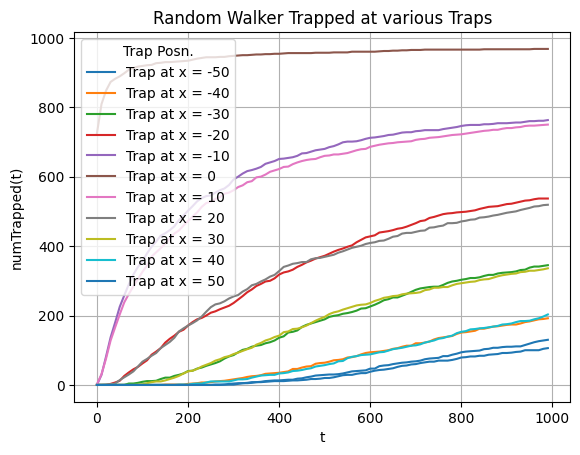

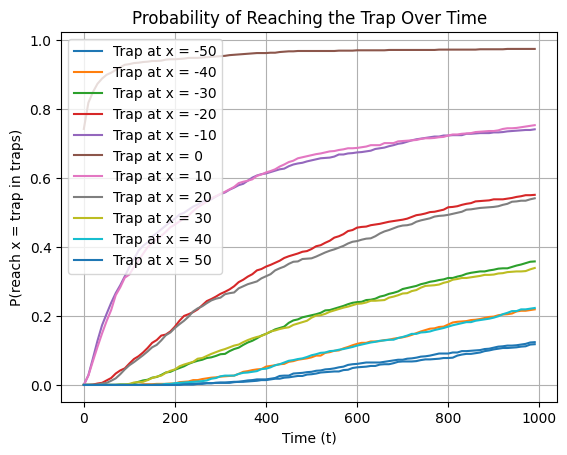

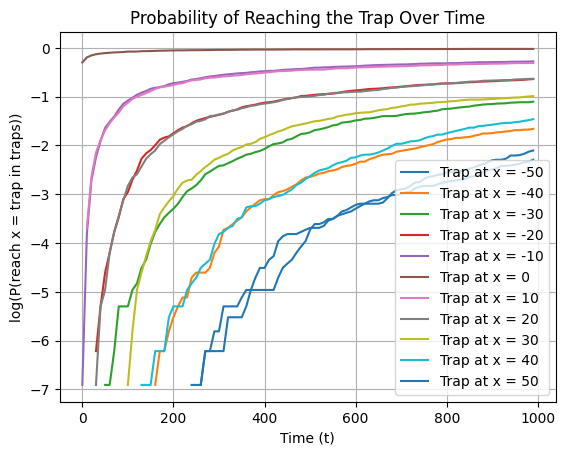

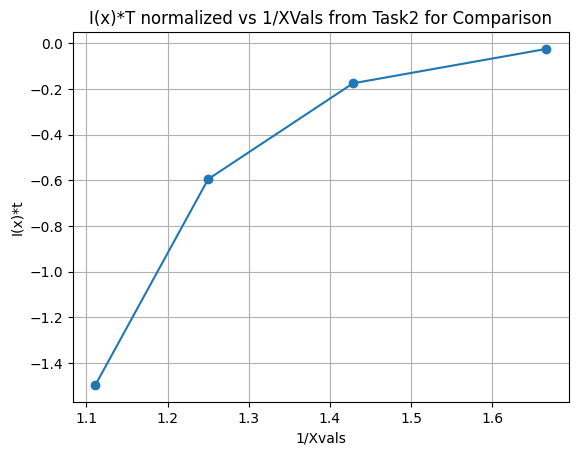

In [47]:
num_walker = 1000
maxT = 1000 #totTime
num_print = 10
traps = [-50,-40,-30,-20,-10,0,10,20,30,40,50]
# trap = 10

# not plotting individual random walks as generating for multiple traps

for trap in traps:
    pos = np.zeros(num_walker)
    trapped = np.zeros(num_walker, dtype=bool)
    numTrapped =[]
    for t in range(0,maxT,num_print):
        for temp in range(num_print):
            choices = np.random.choice([1,-1], size=num_walker)
            pos[~trapped] += choices[~trapped] #masking - if not trapped update values
            trapped[pos == trap] = True #using the power of np arrays to update the truth value of whichever walker's sum has exceeded or equal to trap
        numTrapped.append(np.sum(trapped))
    plt.plot(range(0,maxT,num_print), numTrapped, label=f"Trap at x = {trap}")
plt.xlabel("t")
plt.ylabel("numTrapped(t)")
plt.title("Random Walker Trapped at various Traps")
plt.legend(title="Trap Posn.")
plt.grid()
plt.show()

for trap in traps:
    pos = np.zeros(num_walker)
    trapped = np.zeros(num_walker, dtype=bool)
    y_M =[]
    for t in range(0,maxT,num_print):
        for temp in range(num_print):
            choices = np.random.choice([1,-1], size=num_walker)
            pos[~trapped] += choices[~trapped] #masking - if not trapped update values
            trapped[pos == trap] = True #using the power of np arrays to update the truth value of whichever walker's sum has exceeded or equal to trap
        y_M.append(np.sum(trapped)/num_walker)
    plt.plot(range(0,maxT,num_print), y_M, linestyle='-', label=f"Trap at x = {trap}")
plt.xlabel("Time (t)")
plt.ylabel("P(reach x = trap in traps)")
plt.title("Probability of Reaching the Trap Over Time")
plt.legend()
plt.grid()
plt.show()

for trap in traps:
    pos = np.zeros(num_walker)
    trapped = np.zeros(num_walker, dtype=bool)
    y_M =[]
    for t in range(0,maxT,num_print):
        for temp in range(num_print):
            choices = np.random.choice([1,-1], size=num_walker)
            pos[~trapped] += choices[~trapped] #masking - if not trapped update values
            trapped[pos == trap] = True #using the power of np arrays to update the truth value of whichever walker's sum has exceeded or equal to trap
        y_M.append(np.sum(trapped)/num_walker)
    y_M = np.array(y_M)
    # y_M[y_M == 0] = 1e-20
    mask = y_M > 0
    plt.plot(np.array(range(0,maxT, num_print))[mask], np.log(y_M[mask]), linestyle='-', label=f"Trap at x = {trap}")
plt.xlabel("Time (t)")
plt.ylabel("log(P(reach x = trap in traps))")
plt.title("Probability of Reaching the Trap Over Time")
plt.legend()
plt.grid()
plt.show()



# numTrials = 100

# for trap in traps:
#     timesArr = []
#     for i in range(numTrials):
#         pos = np.zeros(num_walker)
#         trapped = np.zeros(num_walker, dtype=bool)
#         times = np.zeros(num_walker, dtype=int)
#         for t in range(1,maxT+1,num_print):
#             choices = np.random.choice([1,-1], size=num_walker)
#             pos[~trapped] += choices[~trapped] #masking - if not trapped update values
#             trapped[pos == trap] = True #using the power of np arrays to update the truth value of whichever walker's sum has exceeded or equal to trap
#             times[pos == trap] = t
#         timesArr.extend(times[trapped])
#     plt.plot(range(1,maxT+1), (1/(np.mean(timesArr)))*np.arange(1,maxT+1), linestyle='-', label=f"Trap at x = {trap}")
# plt.xlabel("Time (t)")
# plt.ylabel("I(x)*t")
# plt.title("I(x)*t vs t")
# plt.legend()
# plt.grid()
# plt.show()

plt.plot(1/np.array(xvals), (np.array(slopes))*np.arange(1,(maxT+1)/250), marker = "o")
plt.xlabel("1/Xvals")
plt.ylabel("I(x)*t")
plt.title("I(x)*T normalized vs 1/XVals from Task2 for Comparison")
# plt.legend()
plt.grid()
plt.show()



## Task-7: What is the relationship between the result in Task-2 for `Coin Toss problem` and the rate of reaching the trap in Task-6 for `Random walk with a trap` problem

- The relationaship that we can observe is that both graphs obey the same argument in the decay function, I(x)
- The probability of reaching a trap at some x by taking a biased sequence of step to walk towards the trap x is similar to the probability of a biased coin generating a biased fraction of heads in some n coin tosses
- Large deviation theory comes into play here
- The mathemtical relation: P(x = M) or Ym(T) ~ e^(-I(x)*T)
- As seen above, the two graphs log(P(x=M)) vs T and I(x)*T(normalized) vs 1/XVals are similar in shape (differing a constant factor to be multiplied with XVals)